In [59]:
import numpy as np
import matplotlib.pyplot as plt

def binary_step(x, threshold=0):
    return 1 if x >= threshold else 0

def bipolar_step(x, threshold=0):
    return 1 if x >= threshold else -1

def h_step(x, threshold=0):
    if x > threshold:
        return 1
    elif x < -threshold:
        return -1
    else:
        return 0

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100, activation_function=binary_step, bias=0):
        self.input_size = input_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.activation_function = activation_function
        self.weights = np.zeros(input_size)
        self.bias = bias
        self.errors = []  # To store error for analysis
    
    def predict(self, X):
        weighted_sum = np.dot(X, self.weights) + self.bias
        return self.activation_function(weighted_sum, 0.2)
    
    def train(self, X_train, y_train):
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X_train)):
                X = X_train[i]
                y = y_train[i]
                prediction = self.predict(X)
                error = y - prediction
                total_error += abs(error)
                
                # Update weights
                self.weights = [
                    self.weights[j] + self.learning_rate * error * X[j] 
                    for j in range(len(X))
                ]
                # Update bias
                self.bias += self.learning_rate * error
            
            self.errors.append(total_error)
            print(f'Epoch {epoch+1}/{self.epochs}, Total Error: {total_error}, Weights: {self.weights}, Bias: {self.bias}')
            if total_error == 0:  # Stop early if error is 0
                break
    
    def evaluate(self, X_test, y_test):
        predictions = [self.predict(x) for x in X_test]
        accuracy = np.mean([pred == actual for pred, actual in zip(predictions, y_test)])
        print("\nDetail Predictions:")
        for i, (pred, actual) in enumerate(zip(predictions, y_test)):
            print(f"Input {i+1}: Prediction = {pred}, Actual = {actual}")
        return accuracy, predictions
    
    def plot_errors(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.errors) + 1), self.errors, marker='o', label='Total Error')
        plt.title('Training Error Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Total Error')
        plt.grid()
        plt.legend()
        plt.show()

In [60]:
def calculate_metrics(y_true, y_pred):
    tp = sum(1 for yt, yp in zip(y_true, y_pred) if yt == yp == 1)
    tn = sum(1 for yt, yp in zip(y_true, y_pred) if yt == yp == 0)
    fp = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 1)
    fn = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 0)

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print("\nEvaluation Metrics:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1_score:.2f}")

## AND Logic

### Biner Biner

In [61]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

perceptron = Perceptron(input_size=2, learning_rate=1, epochs=100, activation_function=binary_step)
perceptron.train(X, y)
accuracy = perceptron.evaluate(X, y)
print(f"akurasi logika 'dan' dari input biner dan output biner adalah: {accuracy}")

Epoch 1/100, Total Error: 1, Weights: [1.0, 1.0], Bias: 1
Epoch 2/100, Total Error: 3, Weights: [2.0, 1.0], Bias: 0
Epoch 3/100, Total Error: 3, Weights: [2.0, 1.0], Bias: -1
Epoch 4/100, Total Error: 2, Weights: [2.0, 2.0], Bias: -1
Epoch 5/100, Total Error: 1, Weights: [2.0, 1.0], Bias: -2
Epoch 6/100, Total Error: 0, Weights: [2.0, 1.0], Bias: -2

Detail Predictions:
Input 1: Prediction = 0, Actual = 0
Input 2: Prediction = 0, Actual = 0
Input 3: Prediction = 0, Actual = 0
Input 4: Prediction = 1, Actual = 1
akurasi logika 'dan' dari input biner dan output biner adalah: (1.0, [0, 0, 0, 1])


### Biner Bipolar

In [62]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, -1, -1, 1])

perceptron = Perceptron(input_size=2, learning_rate=1, epochs=100, activation_function=bipolar_step)
perceptron.train(X, y)
accuracy = perceptron.evaluate(X, y)
print(f"akurasi logika 'dan' dari input biner dan output bipolar adalah: {accuracy}")

Epoch 1/100, Total Error: 2, Weights: [2.0, 2.0], Bias: 2
Epoch 2/100, Total Error: 6, Weights: [4.0, 2.0], Bias: 0
Epoch 3/100, Total Error: 6, Weights: [4.0, 2.0], Bias: -2
Epoch 4/100, Total Error: 4, Weights: [4.0, 4.0], Bias: -2
Epoch 5/100, Total Error: 2, Weights: [4.0, 2.0], Bias: -4
Epoch 6/100, Total Error: 0, Weights: [4.0, 2.0], Bias: -4

Detail Predictions:
Input 1: Prediction = -1, Actual = -1
Input 2: Prediction = -1, Actual = -1
Input 3: Prediction = -1, Actual = -1
Input 4: Prediction = 1, Actual = 1
akurasi logika 'dan' dari input biner dan output bipolar adalah: (1.0, [-1, -1, -1, 1])


### Bipolar Bipolar

In [63]:
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([-1, -1, -1, 1])

perceptron = Perceptron(input_size=2, learning_rate=1, epochs=100, activation_function=bipolar_step)
perceptron.train(X, y)
accuracy = perceptron.evaluate(X, y)
print(f"akurasi logika 'dan' dari input bipolar dan output bipolar adalah: {accuracy}")

Epoch 1/100, Total Error: 2, Weights: [2.0, 2.0], Bias: 2
Epoch 2/100, Total Error: 4, Weights: [2.0, 2.0], Bias: -2
Epoch 3/100, Total Error: 0, Weights: [2.0, 2.0], Bias: -2

Detail Predictions:
Input 1: Prediction = -1, Actual = -1
Input 2: Prediction = -1, Actual = -1
Input 3: Prediction = -1, Actual = -1
Input 4: Prediction = 1, Actual = 1
akurasi logika 'dan' dari input bipolar dan output bipolar adalah: (1.0, [-1, -1, -1, 1])


## OR Logic

### Biner Biner

In [64]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

perceptron = Perceptron(input_size=2, learning_rate=1, epochs=100, activation_function=binary_step)
perceptron.train(X, y)
accuracy = perceptron.evaluate(X, y)
print(f"akurasi logika 'atau' dari input biner dan output biner adalah: {accuracy}")

Epoch 1/100, Total Error: 1, Weights: [0.0, 1.0], Bias: 1
Epoch 2/100, Total Error: 2, Weights: [1.0, 1.0], Bias: 1
Epoch 3/100, Total Error: 1, Weights: [1.0, 1.0], Bias: 0
Epoch 4/100, Total Error: 0, Weights: [1.0, 1.0], Bias: 0

Detail Predictions:
Input 1: Prediction = 0, Actual = 0
Input 2: Prediction = 1, Actual = 1
Input 3: Prediction = 1, Actual = 1
Input 4: Prediction = 1, Actual = 1
akurasi logika 'atau' dari input biner dan output biner adalah: (1.0, [0, 1, 1, 1])


### Biner Bipolar

In [65]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, 1, 1, 1])

perceptron = Perceptron(input_size=2, learning_rate=1, epochs=100, activation_function=bipolar_step)
perceptron.train(X, y)
accuracy = perceptron.evaluate(X, y)
print(f"akurasi logika 'atau' dari input biner dan output bipolar adalah: {accuracy}")

Epoch 1/100, Total Error: 2, Weights: [0.0, 2.0], Bias: 2
Epoch 2/100, Total Error: 4, Weights: [2.0, 2.0], Bias: 2
Epoch 3/100, Total Error: 2, Weights: [2.0, 2.0], Bias: 0
Epoch 4/100, Total Error: 0, Weights: [2.0, 2.0], Bias: 0

Detail Predictions:
Input 1: Prediction = -1, Actual = -1
Input 2: Prediction = 1, Actual = 1
Input 3: Prediction = 1, Actual = 1
Input 4: Prediction = 1, Actual = 1
akurasi logika 'atau' dari input biner dan output bipolar adalah: (1.0, [-1, 1, 1, 1])


### Bipolar Bipolar

In [66]:
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([-1, 1, 1, 1])

perceptron = Perceptron(input_size=2, learning_rate=1, epochs=100, activation_function=bipolar_step)
perceptron.train(X, y)
accuracy = perceptron.evaluate(X, y)
print(f"akurasi logika 'atau' dari input bipolar dan output bipolar adalah: {accuracy}")

Epoch 1/100, Total Error: 4, Weights: [0.0, 0.0], Bias: 4
Epoch 2/100, Total Error: 2, Weights: [2.0, 2.0], Bias: 2
Epoch 3/100, Total Error: 0, Weights: [2.0, 2.0], Bias: 2

Detail Predictions:
Input 1: Prediction = -1, Actual = -1
Input 2: Prediction = 1, Actual = 1
Input 3: Prediction = 1, Actual = 1
Input 4: Prediction = 1, Actual = 1
akurasi logika 'atau' dari input bipolar dan output bipolar adalah: (1.0, [-1, 1, 1, 1])


## AND NOT

### Biner Biner

In [67]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 1, 0])

perceptron = Perceptron(input_size=2, learning_rate=1, epochs=100, activation_function=binary_step)
perceptron.train(X, y)
accuracy = perceptron.evaluate(X, y)
print(f"akurasi logika 'and not' dari input biner dan output biner adalah: {accuracy}")

Epoch 1/100, Total Error: 2, Weights: [0.0, -1.0], Bias: 0
Epoch 2/100, Total Error: 2, Weights: [0.0, -2.0], Bias: 0
Epoch 3/100, Total Error: 1, Weights: [1.0, -2.0], Bias: 1
Epoch 4/100, Total Error: 1, Weights: [1.0, -2.0], Bias: 0
Epoch 5/100, Total Error: 0, Weights: [1.0, -2.0], Bias: 0

Detail Predictions:
Input 1: Prediction = 0, Actual = 0
Input 2: Prediction = 0, Actual = 0
Input 3: Prediction = 1, Actual = 1
Input 4: Prediction = 0, Actual = 0
akurasi logika 'and not' dari input biner dan output biner adalah: (1.0, [0, 0, 1, 0])


### Biner Bipolar

In [68]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, -1, 1, -1])

perceptron = Perceptron(input_size=2, learning_rate=1, epochs=100, activation_function=bipolar_step)
perceptron.train(X, y)
accuracy = perceptron.evaluate(X, y)
print(f"akurasi logika 'and not' dari input biner dan output bipolar adalah: {accuracy}")

Epoch 1/100, Total Error: 4, Weights: [0.0, -2.0], Bias: 0
Epoch 2/100, Total Error: 4, Weights: [0.0, -4.0], Bias: 0
Epoch 3/100, Total Error: 2, Weights: [2.0, -4.0], Bias: 2
Epoch 4/100, Total Error: 2, Weights: [2.0, -4.0], Bias: 0
Epoch 5/100, Total Error: 0, Weights: [2.0, -4.0], Bias: 0

Detail Predictions:
Input 1: Prediction = -1, Actual = -1
Input 2: Prediction = -1, Actual = -1
Input 3: Prediction = 1, Actual = 1
Input 4: Prediction = -1, Actual = -1
akurasi logika 'and not' dari input biner dan output bipolar adalah: (1.0, [-1, -1, 1, -1])


### Bipolar Bipolar

In [69]:
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([-1, -1, 1, -1])

perceptron = Perceptron(input_size=2, learning_rate=1, epochs=100, activation_function=bipolar_step)
perceptron.train(X, y)
accuracy = perceptron.evaluate(X, y)
print(f"akurasi logika 'and not' dari input bipolar dan output bipolar adalah: {accuracy}")

Epoch 1/100, Total Error: 4, Weights: [0.0, -4.0], Bias: 0
Epoch 2/100, Total Error: 2, Weights: [2.0, -2.0], Bias: -2
Epoch 3/100, Total Error: 0, Weights: [2.0, -2.0], Bias: -2

Detail Predictions:
Input 1: Prediction = -1, Actual = -1
Input 2: Prediction = -1, Actual = -1
Input 3: Prediction = 1, Actual = 1
Input 4: Prediction = -1, Actual = -1
akurasi logika 'and not' dari input bipolar dan output bipolar adalah: (1.0, [-1, -1, 1, -1])


## XOR Logic

### Biner Biner

In [70]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

perceptron = Perceptron(input_size=2, learning_rate=1, epochs=100, activation_function=binary_step)
perceptron.train(X, y)
accuracy = perceptron.evaluate(X, y)
print(f"akurasi logika 'xor' dari input biner dan output biner adalah: {accuracy}")

Epoch 1/100, Total Error: 2, Weights: [-1.0, 0.0], Bias: 0
Epoch 2/100, Total Error: 3, Weights: [-1.0, 0.0], Bias: 1
Epoch 3/100, Total Error: 4, Weights: [-1.0, 0.0], Bias: 1
Epoch 4/100, Total Error: 4, Weights: [-1.0, 0.0], Bias: 1
Epoch 5/100, Total Error: 4, Weights: [-1.0, 0.0], Bias: 1
Epoch 6/100, Total Error: 4, Weights: [-1.0, 0.0], Bias: 1
Epoch 7/100, Total Error: 4, Weights: [-1.0, 0.0], Bias: 1
Epoch 8/100, Total Error: 4, Weights: [-1.0, 0.0], Bias: 1
Epoch 9/100, Total Error: 4, Weights: [-1.0, 0.0], Bias: 1
Epoch 10/100, Total Error: 4, Weights: [-1.0, 0.0], Bias: 1
Epoch 11/100, Total Error: 4, Weights: [-1.0, 0.0], Bias: 1
Epoch 12/100, Total Error: 4, Weights: [-1.0, 0.0], Bias: 1
Epoch 13/100, Total Error: 4, Weights: [-1.0, 0.0], Bias: 1
Epoch 14/100, Total Error: 4, Weights: [-1.0, 0.0], Bias: 1
Epoch 15/100, Total Error: 4, Weights: [-1.0, 0.0], Bias: 1
Epoch 16/100, Total Error: 4, Weights: [-1.0, 0.0], Bias: 1
Epoch 17/100, Total Error: 4, Weights: [-1.0, 0.0

### Biner Bipolar

In [71]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, 1, 1, -1])

perceptron = Perceptron(input_size=2, learning_rate=1, epochs=100, activation_function=bipolar_step)
perceptron.train(X, y)
accuracy = perceptron.evaluate(X, y)
print(f"akurasi logika 'xor' dari input biner dan output biner adalah: {accuracy}")

Epoch 1/100, Total Error: 4, Weights: [-2.0, 0.0], Bias: 0
Epoch 2/100, Total Error: 6, Weights: [-2.0, 0.0], Bias: 2
Epoch 3/100, Total Error: 8, Weights: [-2.0, 0.0], Bias: 2
Epoch 4/100, Total Error: 8, Weights: [-2.0, 0.0], Bias: 2
Epoch 5/100, Total Error: 8, Weights: [-2.0, 0.0], Bias: 2
Epoch 6/100, Total Error: 8, Weights: [-2.0, 0.0], Bias: 2
Epoch 7/100, Total Error: 8, Weights: [-2.0, 0.0], Bias: 2
Epoch 8/100, Total Error: 8, Weights: [-2.0, 0.0], Bias: 2
Epoch 9/100, Total Error: 8, Weights: [-2.0, 0.0], Bias: 2
Epoch 10/100, Total Error: 8, Weights: [-2.0, 0.0], Bias: 2
Epoch 11/100, Total Error: 8, Weights: [-2.0, 0.0], Bias: 2
Epoch 12/100, Total Error: 8, Weights: [-2.0, 0.0], Bias: 2
Epoch 13/100, Total Error: 8, Weights: [-2.0, 0.0], Bias: 2
Epoch 14/100, Total Error: 8, Weights: [-2.0, 0.0], Bias: 2
Epoch 15/100, Total Error: 8, Weights: [-2.0, 0.0], Bias: 2
Epoch 16/100, Total Error: 8, Weights: [-2.0, 0.0], Bias: 2
Epoch 17/100, Total Error: 8, Weights: [-2.0, 0.0

### Bipolar Bipolar

In [72]:
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([-1, 1, 1, -1])

perceptron = Perceptron(input_size=2, learning_rate=1, epochs=100, activation_function=bipolar_step)
perceptron.train(X, y)
accuracy = perceptron.evaluate(X, y)
print(f"akurasi logika 'xor' dari input biner dan output biner adalah: {accuracy}")

Epoch 1/100, Total Error: 6, Weights: [-2.0, -2.0], Bias: 2
Epoch 2/100, Total Error: 8, Weights: [-2.0, -2.0], Bias: 2
Epoch 3/100, Total Error: 8, Weights: [-2.0, -2.0], Bias: 2
Epoch 4/100, Total Error: 8, Weights: [-2.0, -2.0], Bias: 2
Epoch 5/100, Total Error: 8, Weights: [-2.0, -2.0], Bias: 2
Epoch 6/100, Total Error: 8, Weights: [-2.0, -2.0], Bias: 2
Epoch 7/100, Total Error: 8, Weights: [-2.0, -2.0], Bias: 2
Epoch 8/100, Total Error: 8, Weights: [-2.0, -2.0], Bias: 2
Epoch 9/100, Total Error: 8, Weights: [-2.0, -2.0], Bias: 2
Epoch 10/100, Total Error: 8, Weights: [-2.0, -2.0], Bias: 2
Epoch 11/100, Total Error: 8, Weights: [-2.0, -2.0], Bias: 2
Epoch 12/100, Total Error: 8, Weights: [-2.0, -2.0], Bias: 2
Epoch 13/100, Total Error: 8, Weights: [-2.0, -2.0], Bias: 2
Epoch 14/100, Total Error: 8, Weights: [-2.0, -2.0], Bias: 2
Epoch 15/100, Total Error: 8, Weights: [-2.0, -2.0], Bias: 2
Epoch 16/100, Total Error: 8, Weights: [-2.0, -2.0], Bias: 2
Epoch 17/100, Total Error: 8, Wei

#### Hasil akurasi yang didapatkan dari logika XOR tidak mendapatkan 1 karena xor sendiri tidak bisa dikenali oleh garis linear diperlukan garis non linear untuk bisa mengenali logika XOR. Oleh karena itu logika XOR memelukan hidden layer untuk mengenali logika XOR.

#### Contoh XOR dengan Hidden Layer -> (X1 AND NOT X2) OR (X2 AND NOT X1) dengan bipolar.

In [73]:
# (X1 AND NOT X2)
X_1 = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_1 = np.array([-1, -1, 1, -1])

perceptron1 = Perceptron(input_size=2, learning_rate=1, epochs=100, activation_function=bipolar_step)
perceptron1.train(X_1, y_1)
accuracy = perceptron1.evaluate(X_1, y_1)
print(f"Akurasi logika 'x1 and not x2' dari input bipolar dan output bipolar adalah: {accuracy}")

# (X2 AND NOT X1)
X_2 = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_2 = np.array([-1, 1, -1, -1])

perceptron2 = Perceptron(input_size=2, learning_rate=1, epochs=100, activation_function=bipolar_step)
perceptron2.train(X_2, y_2)
accuracy = perceptron2.evaluate(X_2, y_2)
print(f"Akurasi logika 'x2 and not x1' dari input bipolar dan output bipolar adalah: {accuracy}")

# (X1 AND NOT X2) OR (X2 AND NOT X1)
X_3 = np.array([[-1, -1], [-1, 1], [1, -1], [-1, -1]])
y_3 = np.array([-1, 1, 1, -1])

perceptron3 = Perceptron(input_size=2, learning_rate=1, epochs=100, activation_function=bipolar_step)
perceptron3.train(X_3, y_3)
accuracy = perceptron3.evaluate(X_3, y_3)
print(f"Akurasi logika '(x1 and not x2) or (x2 and not x1)' dari input bipolar dan output bipolar adalah: {accuracy}")

Epoch 1/100, Total Error: 4, Weights: [0.0, -4.0], Bias: 0
Epoch 2/100, Total Error: 2, Weights: [2.0, -2.0], Bias: -2
Epoch 3/100, Total Error: 0, Weights: [2.0, -2.0], Bias: -2

Detail Predictions:
Input 1: Prediction = -1, Actual = -1
Input 2: Prediction = -1, Actual = -1
Input 3: Prediction = 1, Actual = 1
Input 4: Prediction = -1, Actual = -1
Akurasi logika 'x1 and not x2' dari input bipolar dan output bipolar adalah: (1.0, [-1, -1, 1, -1])
Epoch 1/100, Total Error: 4, Weights: [-4.0, 0.0], Bias: 0
Epoch 2/100, Total Error: 2, Weights: [-2.0, 2.0], Bias: -2
Epoch 3/100, Total Error: 0, Weights: [-2.0, 2.0], Bias: -2

Detail Predictions:
Input 1: Prediction = -1, Actual = -1
Input 2: Prediction = 1, Actual = 1
Input 3: Prediction = -1, Actual = -1
Input 4: Prediction = -1, Actual = -1
Akurasi logika 'x2 and not x1' dari input bipolar dan output bipolar adalah: (1.0, [-1, 1, -1, -1])
Epoch 1/100, Total Error: 6, Weights: [2.0, 2.0], Bias: 2
Epoch 2/100, Total Error: 0, Weights: [2.0

#### Serta kembangkan bagaimana mengenali huruf berikut.

## X , O

### Biner Biner

Epoch 1/100, Total Error: 2, Weights: [0.5, -0.5, -0.5, -0.5, 0.5, -0.5, 0.5, 0.0, 0.5, -0.5, -0.5, 0.0, 0.5, 0.0, -0.5, -0.5, 0.5, 0.0, 0.5, -0.5, 0.5, -0.5, -0.5, -0.5, 0.5], Bias: 0.0
Epoch 2/100, Total Error: 0, Weights: [0.5, -0.5, -0.5, -0.5, 0.5, -0.5, 0.5, 0.0, 0.5, -0.5, -0.5, 0.0, 0.5, 0.0, -0.5, -0.5, 0.5, 0.0, 0.5, -0.5, 0.5, -0.5, -0.5, -0.5, 0.5], Bias: 0.0


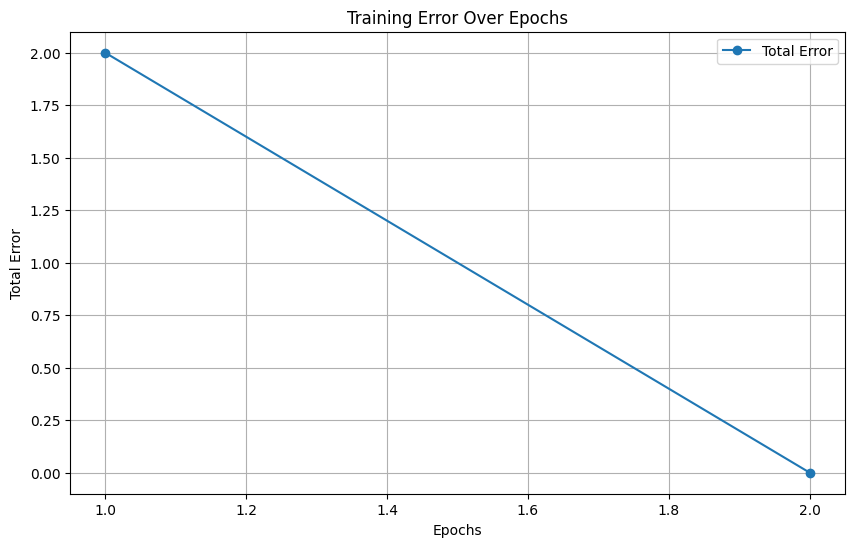


Detail Predictions:
Input 1: Prediction = 1, Actual = 1
Input 2: Prediction = 0, Actual = 0

Accuracy: 1.00

Evaluation Metrics:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [74]:
# Data
X = np.array([
  [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], 
  [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0], 
])
y = np.array([1, 0])

X_test = np.array([
  [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], # X
  [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0], # O
])

# Perceptron Training and Evaluation
perceptron = Perceptron(input_size=25, learning_rate=0.5, epochs=100, activation_function=binary_step)
perceptron.train(X, y)

# Plot Training Error
perceptron.plot_errors()

# Evaluate Model
accuracy, predictions = perceptron.evaluate(X_test, y)
print(f"\nAccuracy: {accuracy:.2f}")

# Calculate and Print Metrics
calculate_metrics(y, predictions)

### Biner Bipolar

Epoch 1/100, Total Error: 4, Weights: [1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 0.0, 1.0, -1.0, -1.0, 0.0, 1.0, 0.0, -1.0, -1.0, 1.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0], Bias: 0.0
Epoch 2/100, Total Error: 0, Weights: [1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 0.0, 1.0, -1.0, -1.0, 0.0, 1.0, 0.0, -1.0, -1.0, 1.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0], Bias: 0.0


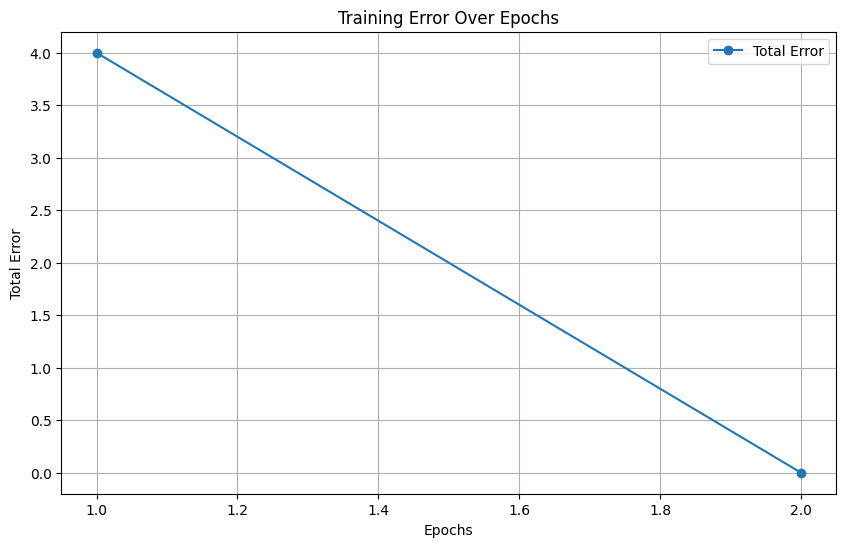


Detail Predictions:
Input 1: Prediction = 1, Actual = 1
Input 2: Prediction = -1, Actual = -1

Accuracy: 1.00

Evaluation Metrics:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [75]:
X = np.array([
  [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], 
  [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0], 
])

y = np.array([1, -1])


X_test = np.array([
  [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], 
  [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0], 
])

# Perceptron Training and Evaluation
perceptron = Perceptron(input_size=25, learning_rate=0.5, epochs=100, activation_function=bipolar_step)
perceptron.train(X, y)

# Plot Training Error
perceptron.plot_errors()

# Evaluate Model
accuracy, predictions = perceptron.evaluate(X_test, y)
print(f"\nAccuracy: {accuracy:.2f}")

# Calculate and Print Metrics
calculate_metrics(y, predictions)


### Bipolar Bipolar

Epoch 1/100, Total Error: 2, Weights: [1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0], Bias: 1.0
Epoch 2/100, Total Error: 0, Weights: [1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0], Bias: 1.0


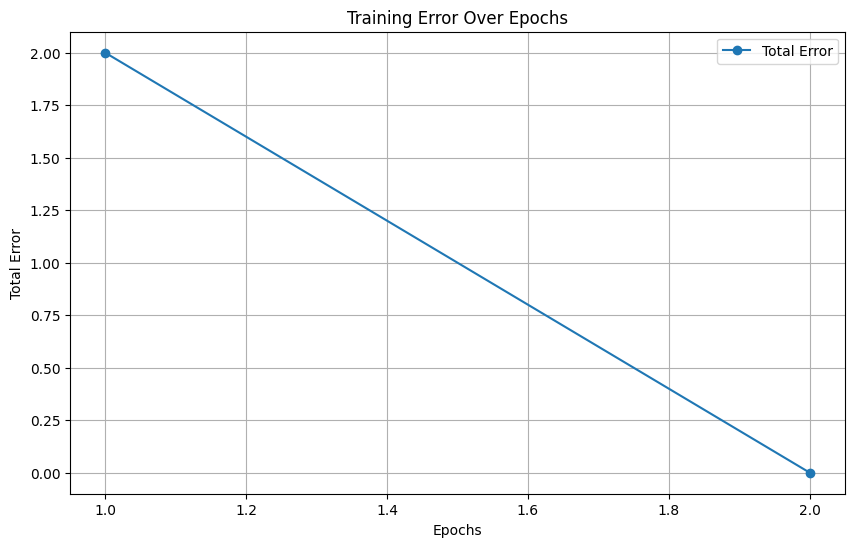


Detail Predictions:
Input 1: Prediction = 1, Actual = 1
Input 2: Prediction = -1, Actual = -1

Accuracy: 1.00

Evaluation Metrics:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [76]:
X = np.array([
  [1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1], 
  [-1, 1, 1, 1, -1, 1, -1, -1, -1, 1,1, -1, -1, -1, 1,1, -1, -1, -1, 1, -1, 1, 1, 1, -1], 
])

y = np.array([1, -1])


X_test = np.array([
  [1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1], 
  [-1, 1, 1, 1, -1, 1, -1, -1, -1, 1,-1, -1, -1, -1, -1,1, -1, -1, -1, 1, -1, 1, 1, 1, -1], 
])

# Perceptron Training and Evaluation
perceptron = Perceptron(input_size=25, learning_rate=0.5, epochs=100, activation_function=bipolar_step)
perceptron.train(X, y)

# Plot Training Error
perceptron.plot_errors()

# Evaluate Model
accuracy, predictions = perceptron.evaluate(X_test, y)
print(f"\nAccuracy: {accuracy:.2f}")

# Calculate and Print Metrics
calculate_metrics(y, predictions)
